<br>
# **자연어 처리과정**

<br>
## 진행할 내용을 목차로 정리
1. text
1. text
1. text

참고블로그
1. 박은정 블로그 : https://www.lucypark.kr/courses/2015-dm/text-mining.html#2-tokenize
1. 한글 Tag 규칙 : https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0
1. 자연어 분석 이론들 정리 : https://ratsgo.github.io/natural%20language%20processing/2017/03/22/lexicon/

<br>
# **파이썬의 특징**
자연어 분석의 특징 및 최근 파이썬이 Hot 한 이유

## 1 파이썬의 장점
1. 다양한 기능을 구현하는 Open Source 들이 많이 제작되어 있다
1. 원하는 기능을 쉽게 구현가능
1. 단 모듈 설치에 따른 Dependency 문제를 해결할 필요가 있다

<br>
# **Word Cloud**
자연어의 **단어별 특징 구분/ 추출**하기

## 1 word cloud 만들기
1. 워드 클라우드를 생성할 Text 데이터를 저장한다
1. 문장별로 구분한 List 데이터로 변환한다
1. 문장의 요소를 자동으로 변환/ 연산하여 WordCloud 를 출력한다

In [1]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
f     = open('./data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()
texts_org[:200]

'존경하는 독일 국민 여러분,\n\n고국에 계신 국민 여러분,\n\n하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,\n\n\n먼저, 냉전과 분단을 넘어 통일을 이루고,\n\n그 힘으로 유럽통합과 국제평화를 선도하고 있는\n\n독일과 독일 국민에게 무한한 경의를 표합니다.\n\n\n오늘 이 자리를 마련해 주신\n\n독일 정부와 쾨르버 재단에도 감사드립니다.\n'

In [2]:
# 줄바꿈 표시를 기준으로 문장을 나눠서 List에 정리한다
texts = texts_org.split('\n')
texts[:5]

['존경하는 독일 국민 여러분,',
 '',
 '고국에 계신 국민 여러분,',
 '',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,']

In [3]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
punct = [punct[i] for i in range(len(punct))]
punct = punct + ['\n']

In [5]:
# 불필요한 기호들을 제거한다
for dump in punct: 
    texts = [txt.replace(dump, '')    for txt in texts]
texts     = [txt    for txt in texts  if len(txt) > 2]
print(len(texts))
texts[:5]

309


['존경하는 독일 국민 여러분',
 '고국에 계신 국민 여러분',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분',
 '먼저 냉전과 분단을 넘어 통일을 이루고',
 '그 힘으로 유럽통합과 국제평화를 선도하고 있는']

(-0.5, 399.5, 199.5, -0.5)

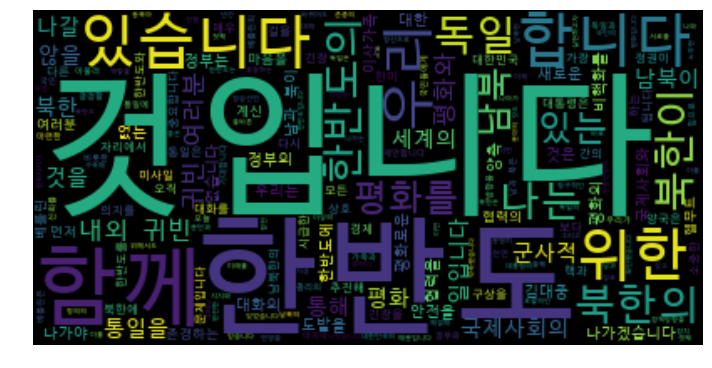

In [6]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(texts_org)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

## 1 의도한 결과를 도출하지 못한경우
1. 해당 모듈의 공식문서에서 별도 함수를 제공하는지 확인한다 [GitHub](https://github.com/amueller/word_cloud)
1. 대상 언어가 영문이 아닌 경우에는 별도의 처리과정을 요한다
1. 해당 언에에 맞는 **별도의 모듈을 사용** 하거나, 
1. 개별적으로 자료에 부합하는 **전처리 및 구조화 작업과정**을 진행한다
<br>
<img src="https://www.lucypark.kr/courses/2015-dm/images/text-process.png" align='left' width='200'>

<br>
# **자연어 분석과정**
<br>
1. 우선 언어학을 근간으로 한다
1. <strike>말소리를 연구하는 **음운론(Phonology)** : 음성인식</strike>
1. 단어와 형태소를 연구하는 **형태론(Morphology)** : 형태소 분석
1. 문법과 맥락/담화를 각각 논의하는 **통사론(syntax)** : 문법적 구조분석(Passing)
1. 단어간의 의미차이를 구분하는 **의미론(Senmantics)** : 뉘앙스, 톤, 말하고자 하는 의도(긍/부정)
1. 그리고 한글과 영어의 문화적 차이
<br>
<img src="http://i.imgur.com/1bhgstG.png" align="left" width="650"/>
<br>

<br>
# **pip3 install -U nltk**
Natural Language Toolkit
1. https://www.nltk.org/ : 공식 Document
1. 자연어 처리에 기본이 되는 모듈이다
1. 다영한 함수들이 정의되어 있지만, 대부분 영어전용으로 구성되어 있다

<img src="https://i.ytimg.com/vi/AKcxEfz-EoI/maxresdefault.jpg" align='left' width='500'>

<br>
# **자연어 분석에 사용되는 용어들 정리**
1. 설명되는 내용의 단어의 의미만 잘 알면 절반 이상은 해결된다.
1. 이는 단어들의 의미를 잘 모르고, 이해가 안되기 때문에 내용이 어렵게 느껴진다
1. 자연어 분석 분야는 **언어학** 및 **활자 문자편집** 내용에서 이론과 내용들을 차용한다

<br>
# **1 어휘분석**

<br>
## **1-1 Token**
한글을 nltk로 다룰때와 차이점

1. **토큰(token)** : 의미를 가지는 문자열로, 형태소나 그보다 상위 개념인 단어까지 포함
1. **토크나이징(tokenizing)** 이란 문서나 문장을 분석하기 좋도록 토큰으로 나누는 작업
1. 영문의 경우 **공백** 만으로도 충분히 토큰을 나눌 수 있다
1. 한글의 경우 **합성어(Barack Obama)** 및 **조사합성** 등의 별도 처리를 요한다

<img src="https://image.slidesharecdn.com/1507091-150708013959-lva1-app6892/95/1-83-638.jpg?cb=1436342938" align='left' width='300'>

In [7]:
# 문장부호를 기준으로 문장을 나눈다
text = "자정이 조금 넘은 시각 낯선 남성이 아파트 엘리베이터까지 따라왔다. 층수를 누르는데. 남성은 미동이 없었다. 문이 열리고 집을 향해 걸었다."

from nltk import sent_tokenize
sent_tokenize(text)

['자정이 조금 넘은 시각 낯선 남성이 아파트 엘리베이터까지 따라왔다.',
 '층수를 누르는데.',
 '남성은 미동이 없었다.',
 '문이 열리고 집을 향해 걸었다.']

In [8]:
from nltk import word_tokenize

text = "I want to Drink a beer"
text = word_tokenize(text)
text

['I', 'want', 'to', 'Drink', 'a', 'beer']

In [9]:
from nltk import FreqDist
dict(FreqDist(text))

{'I': 1, 'want': 1, 'to': 1, 'Drink': 1, 'a': 1, 'beer': 1}

In [10]:
texts_token = word_tokenize(texts_org)
texts_token_dict = dict(FreqDist(texts_token))

In [11]:
import pandas as pd
texts_token_series = pd.Series(texts_token_dict)
texts_token_series.sort_values(ascending=False)

.         168
,          67
것입니다       28
한반도        20
함께         18
있습니다       16
합니다        16
수          15
위한         13
북한의        12
우리         12
나는         11
북한이        11
한반도의       11
이          11
여러분        10
남과         10
독일         10
평화를        10
있는          9
‘           8
남북          8
’           8
더           7
내외          7
귀빈          7
그           6
평화와         6
국제사회의       6
세계의         6
         ... 
상황과         1
정치‧군사적      1
비정치적        1
다섯째         1
경제모델을       1
그때          1
하면          1
실천하기만       1
정상선언을       1
공동번영할       1
교량국가로       1
해양을         1
대륙과         1
추진될         1
철도는         1
협력사업들도      1
연결          1
가스관         1
남·북·러       1
달릴          1
유럽으로        1
러시아와        1
북경으로        1
평양과         1
열차가         1
출발한         1
목포에서        1
부산과         1
이어질         1
유효합니다       1
Length: 1186, dtype: int64

<br>
## **1-2 Regex 정규식**

# **import re**

1. 특정한 규칙을 가진 문자열의 집합을 표현하는 언어
1. Programming Language나 Text Editor 등 에서 문자열의 검색과 치환을 위한 용도로 폭넓게 활용
1. 코드가 간단한 만큼 가독성이 떨어져서 표현식을 숙지하지 않으면 이해하기 힘듬
1. [참고사이트](http://www.nextree.co.kr/p4327/)

<img src="http://www.nextree.co.kr/content/images/2016/09/jhkim-140117-RegularExpression-191.png" align='left' width='400'>

In [12]:
text = "park 010-1234-1234"

import re
re.findall(r'\d+', text)

['010', '1234', '1234']

In [13]:
re.findall(r'[A-z]\w+', text)

['park']

In [14]:
text = "질문이 있으시면 저의 Web Site의 항목을 참고해 주세요"

from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[A-Z]\w+')
re_capt.tokenize(text)

['Web', 'Site의']

In [15]:
from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[가-힣]\w+')
re_capt.tokenize(text)

['질문이', '있으시면', '저의', '항목을', '참고해', '주세요']

<br>
## **2 Stemming**
1. 형태소 분석등을 위한 과정으로, 어원이 변형된 단어를 분석하기 위해 접사 등을 제거하고 그 단어의 어간을 분리한다
1. 어근과 차이가 있더라도 관련이 있는 단어들이 일정하게 동일한 어간으로 맵핑을 목적으로 구조화 한다
1. 영문의 경우 **Penn Treebank Corpus, WordPunctTokenizer(정규식 활용)** 등의 다양한 구분기법이 공개되어 있다

In [16]:
text = " Don't hesitate to ask questions"

# Penn Treebank Corpus 에 따른 기준을 사용하여, 문법별로 나눈다
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = tokenizer.tokenize(text)
text

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']

In [17]:
from nltk import pos_tag
pos_tag(text)

[('Do', 'VBP'),
 ("n't", 'RB'),
 ('hesitate', 'VB'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

In [18]:
text = " Don't hesitate to ask questions"

# WordPunctTokenizer : white-space를 정규식으로 token 생성 (빠르다)
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
text = tokenizer.tokenize(text)
text

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']

In [19]:
from nltk import pos_tag
pos_tag(text)

[('Don', 'NNP'),
 ("'", 'POS'),
 ('t', 'NN'),
 ('hesitate', 'NN'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

In [20]:
# Token을 어떻게 생성하느냐에 따라 Tag 결과값이 다르게 출력된다.
# sentence 의 Text를 전처리 
# 전처리한 내용을 대상으로 Token을 생성한다
# 생성된 Token을 대상으로 품사를 정의한다

In [21]:
text = "질문이 있으시면 저희들의 Web Site를 통해서 거침없이 Question 해주세요"

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = tokenizer.tokenize(text)
text

['질문이', '있으시면', '저희들의', 'Web', 'Site를', '통해서', '거침없이', 'Question', '해주세요']

In [22]:
from nltk import pos_tag
pos_tag(text)

[('질문이', 'JJ'),
 ('있으시면', 'NNP'),
 ('저희들의', 'NNP'),
 ('Web', 'NNP'),
 ('Site를', 'NNP'),
 ('통해서', 'NNP'),
 ('거침없이', 'NNP'),
 ('Question', 'NNP'),
 ('해주세요', 'NN')]

In [23]:
text = "이 무더위 속에서 맥주한잔 마시고 싶습니다"
text = word_tokenize(text)
pos_tag(text)

[('이', 'JJ'),
 ('무더위', 'NNP'),
 ('속에서', 'NNP'),
 ('맥주한잔', 'NNP'),
 ('마시고', 'NNP'),
 ('싶습니다', 'NN')]

In [24]:
import nltk.help as nltk_help
nltk_help.upenn_tagset('PRP')  # 대명사

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [25]:
nltk_help.upenn_tagset('JJ')  # 형용사

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [26]:
# 내용 및 한계
# 개별 단어를 대상응로 태그 값을 추출한다
# 단어별 확률이 높을 결과를 출력한다
# 단점으로 문장의 특징을 별도로 고려하지 않는다
# 평문에 대한 정확도는 높지만, 강조문/ 도치문/ 의문문 등 문장 특성별 차이를 나타낸다

<br>
## **3 한글 Token 생성**

# **pip3 install konlpy **

http://konlpy.org/ko/v0.4.4/install/
1. Java 7 이상의 버젼을 먼저 설치해야 한다
1. sudo apt-get install g++ openjdk-7-jdk python-dev python3-dev   
1. pip3 install JPype1-py3   # Python 3.x
1. pip3 install konlpy

<img src="https://t1.daumcdn.net/cfile/tistory/994DEB3C5B37806C03" align='left' width='500'/>

In [28]:
# Sentence 에서 Token을 추출하고
# 추출한 Token을 대상으로 Stemming 형태소를 구분하여 태드를 출력한다
# 이 모든작업을 1개의 함수로써 모든 처리를 한다

text = '단독입찰보다 복수입찰의 경우'
twitter.pos(text)

[('단독', 'Noun'),
 ('입찰', 'Noun'),
 ('보다', 'Josa'),
 ('복수', 'Noun'),
 ('입찰', 'Noun'),
 ('의', 'Josa'),
 ('경우', 'Noun')]

<br>
## **3-2 한글형태소 언어팩 목록**
1. https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/05/10/postag/
1. http://incredible.ai/nlp/2016/12/28/NLP/
        Hannanum: KAIST의 한나눔 형태소 분석기와 NLP_HUB 구문분석기 (카이스트 최기선 교수 연구실)
        KKMA: 서울대의 꼬꼬마 형태소/구문 분석기 v2.1 (서울대 이상구 교수 연구실)
        Twitter: OpenKoreanText의 오픈 소스 한국어 처리기 v2.2.0 (구 Twitter 한국어 분석기)1-1
        Eunjeon: 은전한닢 프로젝트의 SEunjeon(S은전) (이용운, 유영호 (은전한닢 프로젝트))
        KOMORAN: Junsoo Shin님의 코모란 v3.3.3
        Arirang: 이수명님의 Arirang Morpheme Analyzer 1-2
        RHINO: 최석재님의 RHINO v2.5.4

<img src="http://i.imgur.com/RXBrbue.png" align='left' width='300'>

In [29]:
### 구분 	          꼬꼬마 	    코모란   트위터
### 소요시간(초) 	160.434 	13.152 	9.815

# 빠른 분석이 중요할 때 : 트위터
# 정확한 품사 정보가 필요할 때 : 꼬꼬마
# 정확성, 시간 모두 중요할 때 : 코모란

In [30]:
%%time

# 가장 Low 단위로 Tag 내용을 구분하여 출력한다
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('했', 'Verb'), ('다', 'Eomi')]
CPU times: user 30.4 ms, sys: 609 µs, total: 31 ms
Wall time: 14.1 ms


In [31]:
%%time

# Corpus 말뭉치 사전을 활용하여 Tag 내용을 출력한다
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text, stem=True))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 528 ms, sys: 21.2 ms, total: 549 ms
Wall time: 215 ms


In [32]:
%%time

# 신조어 또는 사용자가 원하는 임의 태그를 사용하고 싶은경우
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('했', 'Verb'), ('다', 'Eomi')]
CPU times: user 9.5 ms, sys: 0 ns, total: 9.5 ms
Wall time: 6.99 ms


In [33]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.pos(text))

[('민병', 'NNG'), ('삼', 'NNG'), ('대령', 'NNG'), ('의', 'JKG'), ('항명', 'NNG'), ('행위', 'NNG'), ('로', 'JKM'), ('초치', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN')]
CPU times: user 16.3 s, sys: 205 ms, total: 16.6 s
Wall time: 5.61 s


In [34]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Hannanum
han = Hannanum()
print(han.pos(text))

[('민병삼', 'N'), ('대령', 'N'), ('의', 'J'), ('항명행위', 'N'), ('로', 'J'), ('초치했다', 'N')]
CPU times: user 6.54 s, sys: 88.9 ms, total: 6.63 s
Wall time: 1.94 s


<br>
## **4 한글 WordCloud 만들기**

1. 앞에서 시연한 내용은 단어의 Tag 속성구분없이 개별 단어들의 빈도로 생성
1. 결과값이 '것이다' '입니다' 등 의미과 상관없이 반복이 많이된 내용을 우선적으로 출력
1. 한글의 특성상 문장의 명사와 동사를 통해서 주된 의미를 추출가능
1. WordCloud의 경우, 문장내 명사의 반복 정도를 통해서 화자의 핵심 주제를 주로 파악한다
1. 이번의 경우에도 '베를린 선언문'의 명사반복을 통해서 화자의 중심을 추출해본다

In [35]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
f     = open('./data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()

In [36]:
texts_nouns = twitter.nouns(texts_org)
texts_nouns[:10]

['독일', '국민', '여러분', '고국', '국민', '여러분', '하울', '젠', '쾨르버', '재단']

In [37]:
result_nouns = ''
for txt in texts_nouns:
    result_nouns += " " + txt

result_nouns[:500]

' 독일 국민 여러분 고국 국민 여러분 하울 젠 쾨르버 재단 이사 모드 전 동독 총리 내외 귀빈 여러분 먼저 냉전 분단 통일 그 힘 유럽 통합 국제 평화 선도 독일 독일 국민 무한 경의 표 오늘 이 자리 주신 독일 정부 쾨르버 재단 감사 얼마 전 별세 헬 무트 콜 총리 가족 독일 국민 은 애도 위로 마음 대한민국 냉전 시기 환경 속 적극 능동 외교 독일 통일 유럽 통합 주도 헬 무트 콜 총리 업적 것 친 애하 내외 귀빈 여러분 곳 베를린 지금 년 전 한국 김대중 대통령 남북 화해 협력 기틀 베를린 선언 곳 여기 알테스 슈 타트 하우스 독일 통일 조약 협상 역사 현장 나 오늘 베를린 교훈 이 자리 대한민국 새 정부 한반도 평화 구상 내외 귀빈 여러분 독일 통일 경험 지구 마지막 분단국가 우리 통일 대한 희망 우리 방향 그것 우선 통일 과정 중요성 독일 통일 상호 존중 바탕 평화 협력 과정 얼마나 일 독일 국민 이 과정 축적 신뢰 바탕 스스로 통일 결정 수 동서 독 시민 분야 교류 협력 '

(-0.5, 399.5, 199.5, -0.5)

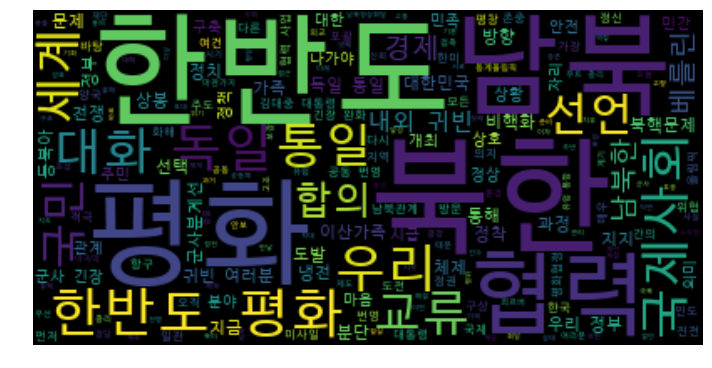

In [38]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(result_nouns)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")